# Correlation between BSS trips and COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

## Import and prepare covid data

In [2]:
data_folder = '../../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/covid_grouped_by_month.csv')
covid_data.head()

,date,new_cases_ma,new_deaths_ma
0,2020-03-01,150.576923,12.333333
1,2020-04-01,2174.333333,154.366667
2,2020-05-01,12159.870968,709.129032
3,2020-06-01,27629.260870,1006.033333
4,2020-07-01,38946.774194,1044.064516


In [3]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [4]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data.head()

,new_cases_ma,new_deaths_ma
date,,
2020-03-01,150.576923,12.333333
2020-04-01,2174.333333,154.366667
2020-05-01,12159.870968,709.129032
2020-06-01,27629.260870,1006.033333
2020-07-01,38946.774194,1044.064516


## Prepare trips data

In [5]:
without_outliers = False

In [6]:
if without_outliers:
    source_folder_path =  data_folder + 'trips/preprocessed/grouped/'
else:
    source_folder_path = data_folder + 'trips/preprocessed/grouped/'

destination_folder_path = data_folder + 'charts/covid/'

In [7]:
trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')
trips.head()

,date,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday
0,2018-01-01,342,1692.779104,18.985294,15.932353,NaN,15.757310,1.967836,0.058480,0.000000
1,2018-02-01,13344,1774.028374,18.569040,17.529425,NaN,13.633094,2.703312,0.172662,0.032224
2,2018-03-01,24889,1575.750603,16.963756,16.993008,NaN,13.020933,2.663104,0.157660,0.014183
3,2018-04-01,32386,1479.865863,20.674716,20.473042,NaN,13.341382,2.464120,0.136355,0.027790
4,2018-05-01,68695,1623.848603,53.345687,53.443712,NaN,13.521828,2.491608,0.141713,0.072218


In [8]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [9]:
trips = dp.transform_to_datetime(trips, ['date'])

In [10]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [11]:
trips

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday
date,,,,,,,,,
2018-01-01,342,1692.779104,18.985294,15.932353,NaN,15.757310,1.967836,0.058480,0.000000
2018-02-01,13344,1774.028374,18.569040,17.529425,NaN,13.633094,2.703312,0.172662,0.032224
2018-03-01,24889,1575.750603,16.963756,16.993008,NaN,13.020933,2.663104,0.157660,0.014183
2018-04-01,32386,1479.865863,20.674716,20.473042,NaN,13.341382,2.464120,0.136355,0.027790
2018-05-01,68695,1623.848603,53.345687,53.443712,NaN,13.521828,2.491608,0.141713,0.072218
2018-06-01,92508,1340.546495,59.543914,58.059387,NaN,13.664440,2.519501,0.136042,0.000000
2018-07-01,112047,1740.148825,65.787734,63.875300,NaN,13.602167,2.556052,0.176979,0.024383
2018-08-01,137359,1630.027234,64.914536,63.809777,NaN,13.650303,2.525215,0.121506,0.000000
2018-09-01,161500,1623.839089,66.580790,64.723008,NaN,13.669412,2.724378,0.218693,0.023777


## Merge COVID and trip data

In [12]:
trips_and_covid = pd.merge(trips, covid_data, how = 'outer', left_index=True, right_index=True)
trips_and_covid = trips_and_covid[:'2022-04-30']
trips_and_covid

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,
2018-01-01,342.0,1692.779104,18.985294,15.932353,NaN,15.757310,1.967836,0.058480,0.000000,NaN,NaN
2018-02-01,13344.0,1774.028374,18.569040,17.529425,NaN,13.633094,2.703312,0.172662,0.032224,NaN,NaN
2018-03-01,24889.0,1575.750603,16.963756,16.993008,NaN,13.020933,2.663104,0.157660,0.014183,NaN,NaN
2018-04-01,32386.0,1479.865863,20.674716,20.473042,NaN,13.341382,2.464120,0.136355,0.027790,NaN,NaN
2018-05-01,68695.0,1623.848603,53.345687,53.443712,NaN,13.521828,2.491608,0.141713,0.072218,NaN,NaN
2018-06-01,92508.0,1340.546495,59.543914,58.059387,NaN,13.664440,2.519501,0.136042,0.000000,NaN,NaN
2018-07-01,112047.0,1740.148825,65.787734,63.875300,NaN,13.602167,2.556052,0.176979,0.024383,NaN,NaN
2018-08-01,137359.0,1630.027234,64.914536,63.809777,NaN,13.650303,2.525215,0.121506,0.000000,NaN,NaN
2018-09-01,161500.0,1623.839089,66.580790,64.723008,NaN,13.669412,2.724378,0.218693,0.023777,NaN,NaN


In [13]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-01-01 00:00:00')

In [14]:
trips_and_covid = trips_and_covid.rename({'distance_in_meters_bicycle':'distance'}, axis = 1)

In [15]:
trips_and_covid

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,
2018-01-01,342.0,1692.779104,18.985294,15.932353,NaN,15.757310,1.967836,0.058480,0.000000,NaN,NaN
2018-02-01,13344.0,1774.028374,18.569040,17.529425,NaN,13.633094,2.703312,0.172662,0.032224,NaN,NaN
2018-03-01,24889.0,1575.750603,16.963756,16.993008,NaN,13.020933,2.663104,0.157660,0.014183,NaN,NaN
2018-04-01,32386.0,1479.865863,20.674716,20.473042,NaN,13.341382,2.464120,0.136355,0.027790,NaN,NaN
2018-05-01,68695.0,1623.848603,53.345687,53.443712,NaN,13.521828,2.491608,0.141713,0.072218,NaN,NaN
2018-06-01,92508.0,1340.546495,59.543914,58.059387,NaN,13.664440,2.519501,0.136042,0.000000,NaN,NaN
2018-07-01,112047.0,1740.148825,65.787734,63.875300,NaN,13.602167,2.556052,0.176979,0.024383,NaN,NaN
2018-08-01,137359.0,1630.027234,64.914536,63.809777,NaN,13.650303,2.525215,0.121506,0.000000,NaN,NaN
2018-09-01,161500.0,1623.839089,66.580790,64.723008,NaN,13.669412,2.724378,0.218693,0.023777,NaN,NaN


## Correlation

In [16]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable, without_outliers = False):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    for i in range(len(correlation)):
        if correlation[i] > 0:
            va="bottom"
        else:
            va="top"
        plt.text(i, correlation[i], round(correlation[i], 2), ha="center", va=va)
    title = "Correlation with '{variable}' variable".format(variable = target_variable)
    if without_outliers:
        title = title + ' (without outliers)'
    plt.title(title)
    if without_outliers:
        filename = target_variable + '_without_outliers.png'
    else:
        filename = target_variable + '.png'
    plt.savefig(destination_folder_path + 'correlation/' + filename)
    plt.show(True)

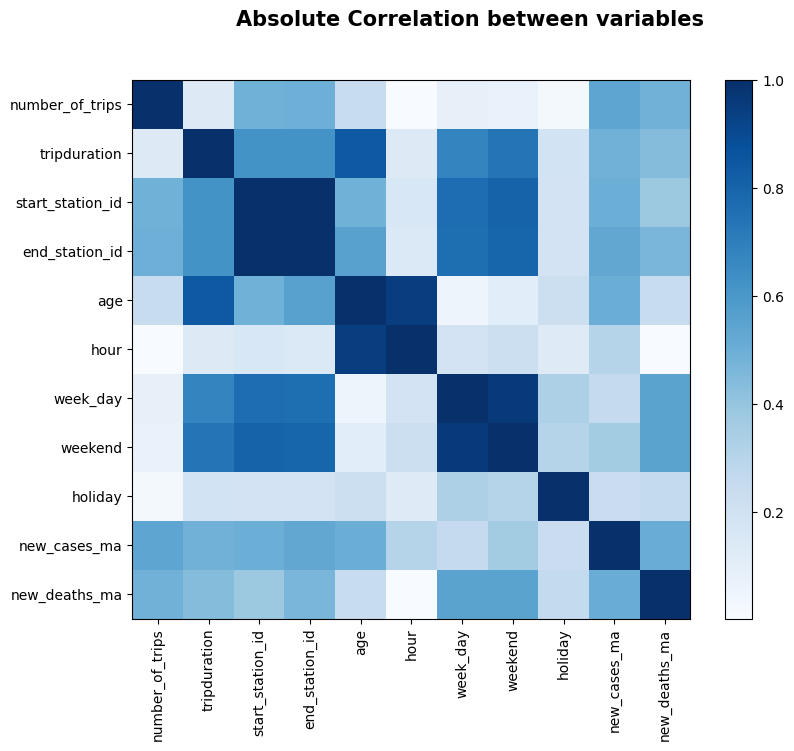

In [17]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

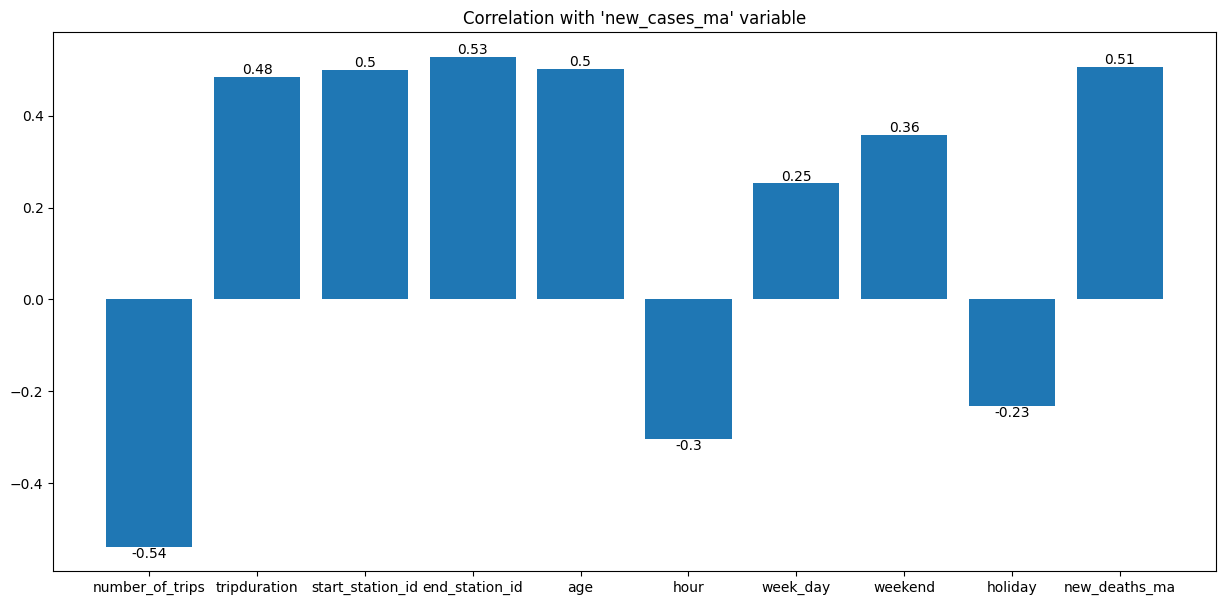

In [18]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_cases_ma',
                                                             without_outliers = without_outliers)

## COVID-19 deaths

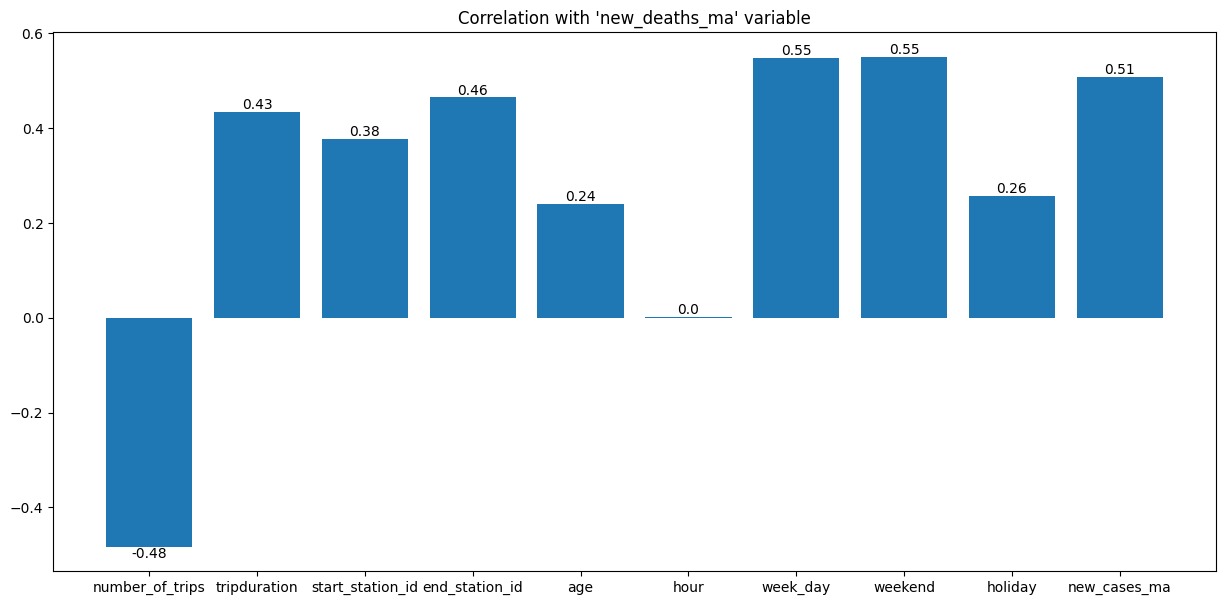

In [19]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_deaths_ma',
                                                             without_outliers = without_outliers)

### Plot together

In [20]:
trips_and_covid

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,
2018-01-01,342.0,1692.779104,18.985294,15.932353,NaN,15.757310,1.967836,0.058480,0.000000,NaN,NaN
2018-02-01,13344.0,1774.028374,18.569040,17.529425,NaN,13.633094,2.703312,0.172662,0.032224,NaN,NaN
2018-03-01,24889.0,1575.750603,16.963756,16.993008,NaN,13.020933,2.663104,0.157660,0.014183,NaN,NaN
2018-04-01,32386.0,1479.865863,20.674716,20.473042,NaN,13.341382,2.464120,0.136355,0.027790,NaN,NaN
2018-05-01,68695.0,1623.848603,53.345687,53.443712,NaN,13.521828,2.491608,0.141713,0.072218,NaN,NaN
2018-06-01,92508.0,1340.546495,59.543914,58.059387,NaN,13.664440,2.519501,0.136042,0.000000,NaN,NaN
2018-07-01,112047.0,1740.148825,65.787734,63.875300,NaN,13.602167,2.556052,0.176979,0.024383,NaN,NaN
2018-08-01,137359.0,1630.027234,64.914536,63.809777,NaN,13.650303,2.525215,0.121506,0.000000,NaN,NaN
2018-09-01,161500.0,1623.839089,66.580790,64.723008,NaN,13.669412,2.724378,0.218693,0.023777,NaN,NaN


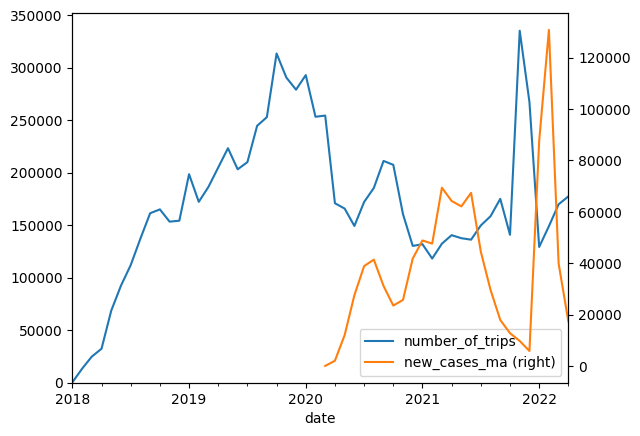

In [21]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None))

In [22]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None))
    plt.ylim(bottom=0)
    title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title)
    ax.axvline('2020-03-24', color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline('2020-05-27', color="purple", linestyle="--",  label='Plano SP de retomada consciente')
    ax.axvline('2020-10-06', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2020-11-30', color="yellow", linestyle="--",  label='Fase Amarela')
    ax.axvline('2021-03-15', color="red", linestyle="--",  label='Fase Emergencial')
    ax.axvline('2021-08-17', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2021-11-01', color="m", linestyle="--",  label='Fim das restrições')
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    plt.savefig(destination_folder_path + 'versus_covid/'+filename)

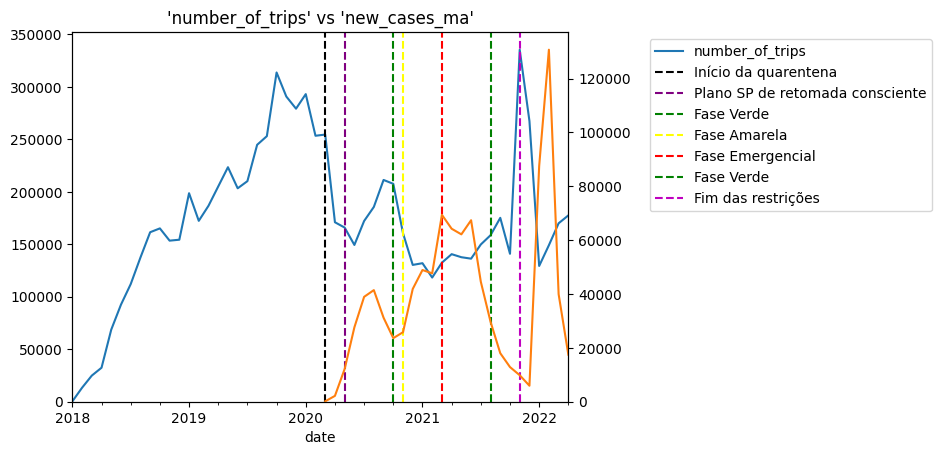

In [23]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

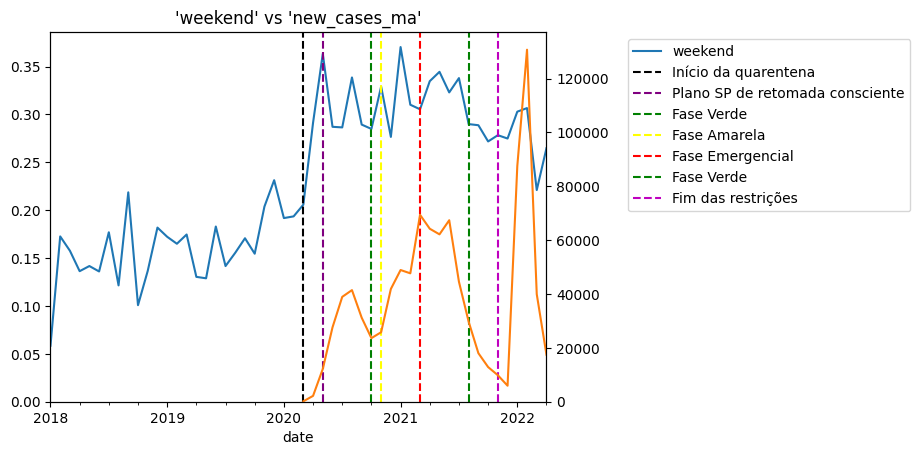

In [24]:
variable = 'weekend'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

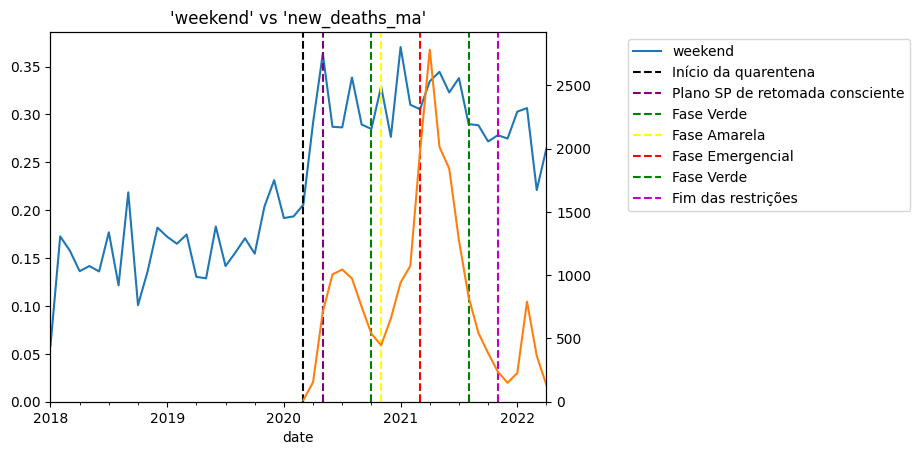

In [25]:
variable = 'weekend'
covid_variable = 'new_deaths_ma'
plot_variable_and_covid_together(variable, covid_variable)

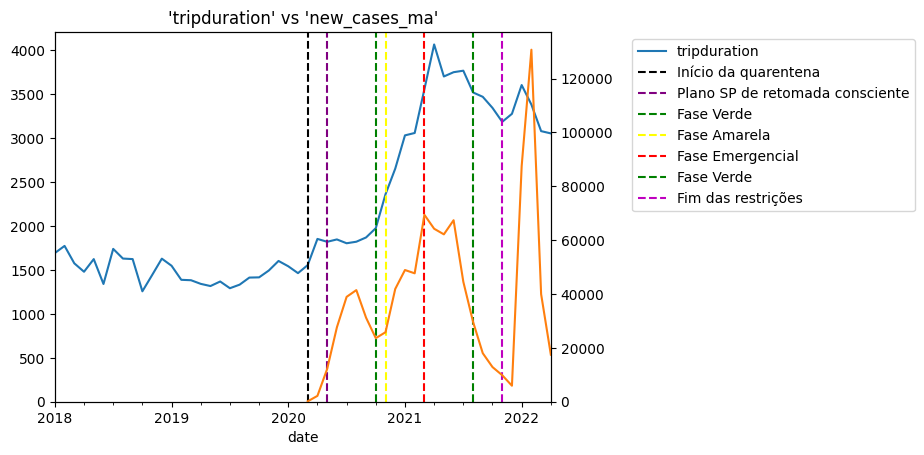

In [26]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

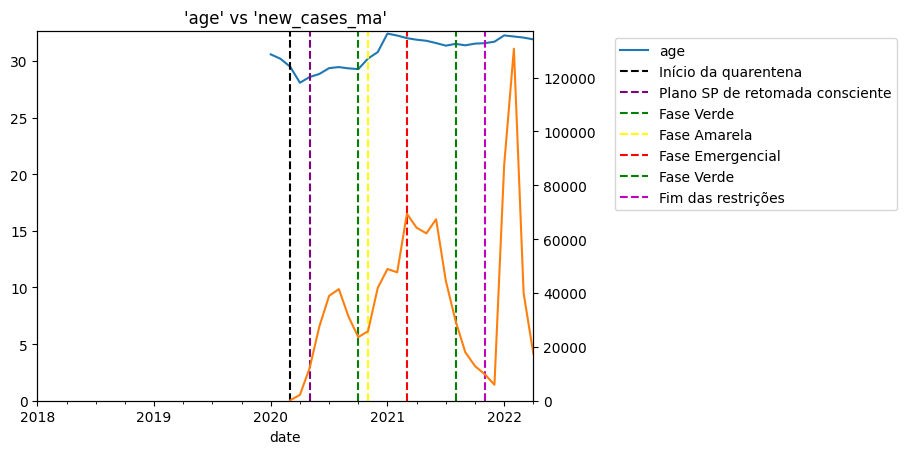

In [27]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

<AxesSubplot:xlabel='date'>

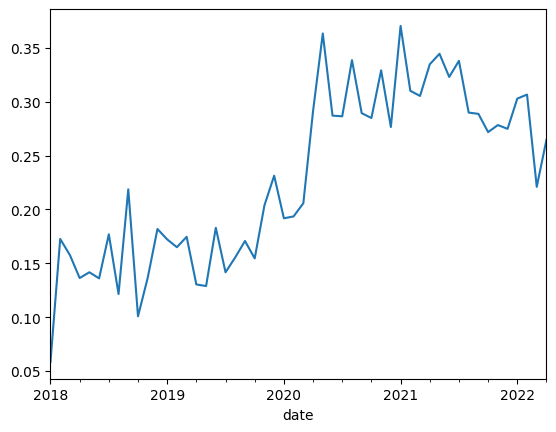

In [28]:
trips['weekend'].plot()